# Red Neuronal - Lineal + $sin(x)$

In [ ]:
#Librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt

## Datos

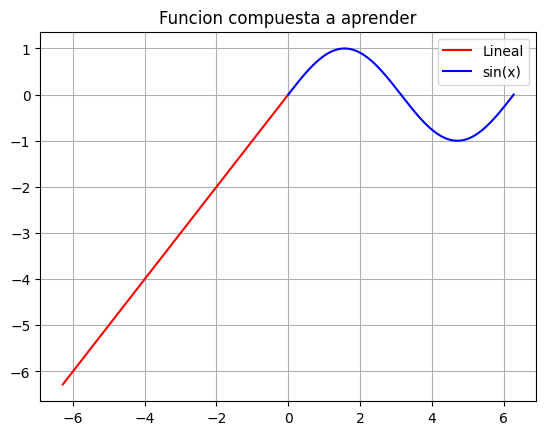

In [ ]:
x1 = np.linspace(-2*np.pi,0, 1000).reshape(-1, 1)
y1 = x1

x2 = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
y2 = np.sin(x2)

x = np.vstack((x1, x2))
y = np.vstack((y1, y2))

# Graficar
plt.plot(x1, y1, label="Lineal", c="red")
plt.plot(x2, y2, label="sin(x)", c="blue")
plt.legend()
plt.grid(True)
plt.title("Funcion compuesta a aprender")
plt.show()

## Selección de datos de entrenamiento

In [ ]:
N_data = len(x)
N_data_train = 25

# idx_train son N_data_train numero de indices tomados de forma random de 0 a N_data
idx_train = np.random.choice(N_data, N_data_train, replace=False)

x_train = x[idx_train]
y_train = y[idx_train]

## Funciones Auxiliares

In [ ]:
# Activación y derivada
def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1.0 - np.tanh(x)**2

# Loss MSE
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)


## Definiendo la RED NEURONAL

### Inicializacion de parámetros

In [ ]:

def init_params(n_input, n_neurons, n_output, n_layers):

    # Inicializa pesos y sesgos vacios como listas:
    # weights[0] matriz de w de la primer capa
    # weights[1] matriz de w de la segunda capa
    # analogo para los sesgos b
    weights = []
    biases = []

    # PRIMERA CAPA
    # randn: N(0,1)-> valores entre [-3,3] con 96%.
    # El 0.1 hace que los pesos se inicialicen en la zona lineal de tanh()
    # Agrega una matriz de valores random de dimension: n_input x n_neurons
    weights.append(np.random.randn(n_input, n_neurons) * 0.1)
    # inicializa en 0, agregando un vector de dimension 1 x n_neurons a la lista
    biases.append(np.zeros((1, n_neurons)))

    # CAPAS OCULTAS INTERMEDIAS
    # Agrega (n_layers - 1) elementos a las listas de pesos y sesgos.
    # Cada elementos son matrices (o vectores) de los tamaños correspondientes (similar a la primer capa)
    for _ in range(n_layers - 1):
        weights.append(np.random.randn(n_neurons, n_neurons) * 0.1)
        biases.append(np.zeros((1, n_neurons)))

    # CAPA DE SALIDA
    # Agrega un elemento mas a las listas de pesos y sesgos de forma silimar a lo anterior
    # pero con el tamaño correspondiente a la dimension de salida
    weights.append(np.random.randn(n_neurons, n_output) * 0.1)
    biases.append(np.zeros((1, n_output)))

    return weights, biases



### Forward and Backward

In [ ]:
# ===== FORWARD PASS ===== #
def forward(x, weights, biases):

    outputs = [x]         # Se guardan las salidas de cada capa (incluyendo la entrada, y la salida final)
    pre_activations = []  # Se guardan los calculos pre activaciones (Wx+b) de cada capa (incluyendo la salida final)
    a = x                 # Cambio de variable (para no modificar la variable de entrada)

    # Para cada capa (menos la última)...
    for i in range(len(weights) - 1):
        # se calcula la pre_activacion z = aW+b
        z = a @ weights[i] + biases[i]
        # se agrega a la lista de pre_activaciones
        pre_activations.append(z)
        # se le aplica la activacion
        a = tanh(z)
        # se agrega a la lista de salidas de capa
        outputs.append(a)

    # Para la capa de salida no hay activación
    # entonces se calula la pre_activacion z = aW+b
    z = a @ weights[-1] + biases[-1]
    # se agrega a la lista de pre_activaciones
    pre_activations.append(z)
    # y tambien se agrega a la lista de salidas de capas (sin activar)
    outputs.append(z)

    return outputs, pre_activations

# ===== BACKWARD PASS ===== #
def backward(y_true, outputs, pre_activations, weights):

    # Inicializa las listas de gradientes de la loss con respecto a los pesos y los sesgos
    # cada elemento tendra el gradiente de cada capa
    grads_w = [None] * len(weights)
    grads_b = [None] * len(weights)

    # Obtiene la cantidad de elementos contra los que se calculará el error
    m = y_true.shape[0]

    delta = 2 * (outputs[-1] - y_true) / m  # capa de salida

    for l in reversed(range(len(weights))):
        grads_w[l] = outputs[l].T @ delta
        grads_b[l] = np.sum(delta, axis=0, keepdims=True)

        if l != 0:
            delta = (delta @ weights[l].T) * deriv_tanh(pre_activations[l - 1])

    return grads_w, grads_b

### Entrenamiento

In [ ]:

# Entrenamiento
def train(x_train, y_train, num_neurons, num_hidden_layers, lr, epochs):
    weights, biases = init_params(1, num_neurons, 1, num_hidden_layers)
    loss_history = []

    for epoch in range(epochs):
        activations, zs = forward(x_train, weights, biases)
        loss = loss_function(activations[-1], y_train)
        loss_history.append(loss)

        grads_w, grads_b = backward(y_train, activations, zs, weights)

        # Actualización
        for i in range(len(weights)):
            weights[i] -= lr * grads_w[i]
            biases[i] -= lr * grads_b[i]

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

    return weights, biases, loss_history

## Entrenamiento

In [ ]:
# Entrenar red profunda
n_hlayers = 2
n_neurons = 20
learning_rate = 5e-2
N_epochs = 200000
weights, biases, loss_history = train(x_train, y_train, n_neurons, n_hlayers, learning_rate, N_epochs)

# Predicción
activations, _ = forward(x, weights, biases)
y_pred = activations[-1]



Epoch 0, Loss: 11.839652
Epoch 100, Loss: 0.180977
Epoch 200, Loss: 0.211911
Epoch 300, Loss: 0.159286
Epoch 400, Loss: 0.123347
Epoch 500, Loss: 0.101693
Epoch 600, Loss: 0.089937
Epoch 700, Loss: 0.082767
Epoch 800, Loss: 0.077933
Epoch 900, Loss: 0.074189
Epoch 1000, Loss: 0.070848
Epoch 1100, Loss: 0.067963
Epoch 1200, Loss: 0.065360
Epoch 1300, Loss: 0.062524
Epoch 1400, Loss: 0.059499
Epoch 1500, Loss: 0.056528
Epoch 1600, Loss: 0.053718
Epoch 1700, Loss: 0.051094
Epoch 1800, Loss: 0.048660
Epoch 1900, Loss: 0.046414
Epoch 2000, Loss: 0.044352
Epoch 2100, Loss: 0.042460
Epoch 2200, Loss: 0.040706
Epoch 2300, Loss: 0.039051
Epoch 2400, Loss: 0.037460
Epoch 2500, Loss: 0.035922
Epoch 2600, Loss: 0.034448
Epoch 2700, Loss: 0.033053
Epoch 2800, Loss: 0.031750
Epoch 2900, Loss: 0.030542
Epoch 3000, Loss: 0.029427
Epoch 3100, Loss: 0.028399
Epoch 3200, Loss: 0.027451
Epoch 3300, Loss: 0.026576
Epoch 3400, Loss: 0.025766
Epoch 3500, Loss: 0.025016
Epoch 3600, Loss: 0.024320
Epoch 3700, 

## Evolución de la Loss

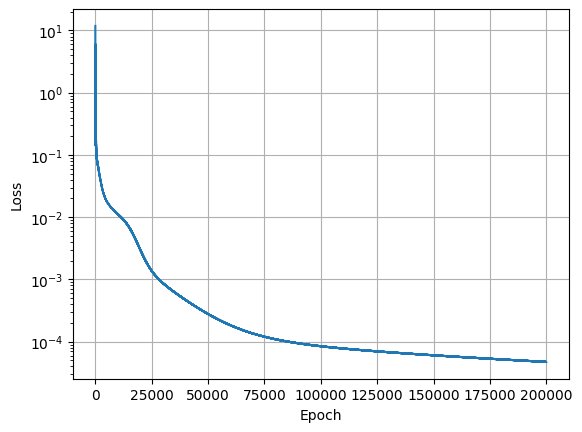

In [ ]:
plt.semilogy(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Grafica Real vs Predicción

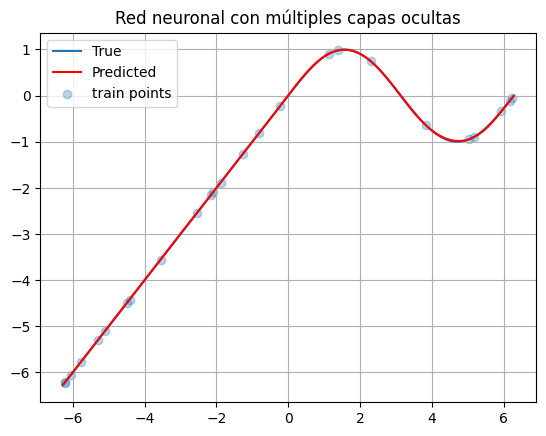

In [ ]:
# Graficar
plt.plot(x, y, label="True")
plt.plot(x, y_pred, label="Predicted", c="red" )
plt.scatter(x_train, y_train, label="train points", alpha=0.3)
plt.legend()
plt.grid(True)
plt.title("Red neuronal con múltiples capas ocultas")
plt.show()